## Info
The dataset and the codebook are available on Kaggle:
https://www.kaggle.com/miroslavsabo/young-people-survey


### Task 1: predict music genre based on other variables
- Approach 1: kNN classifier
- Approach 2: simple neural net


### Task 2: cluster people according to all variables
- k-means (possibly in tensorflow)

### TODO
- code the codebook: for plotting, have the interpretation of answers inside the Dataset object

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.data import *

# Load and explore the dataset

In [3]:
d = LifestyleDataset("data/117_1001_bundle_archive.zip")

In [4]:
d.descriptions.original.tolist()

['I enjoy listening to music.',
 'I prefer.',
 'Dance, Disco, Funk',
 'Folk music',
 'Country',
 'Classical',
 'Musicals',
 'Pop',
 'Rock',
 'Metal, Hard rock',
 'Punk',
 'Hip hop, Rap',
 'Reggae, Ska',
 'Swing, Jazz',
 'Rock n Roll',
 'Alternative music',
 'Latin',
 'Techno, Trance',
 'Opera',
 'I really enjoy watching movies.',
 'Horror movies',
 'Thriller movies',
 'Comedies',
 'Romantic movies',
 'Sci-fi movies',
 'War movies',
 'Tales',
 'Cartoons',
 'Documentaries',
 'Western movies',
 'Action movies',
 'History',
 'Psychology',
 'Politics',
 'Mathematics',
 'Physics',
 'Internet',
 'PC Software, Hardware',
 'Economy, Management',
 'Biology',
 'Chemistry',
 'Poetry reading',
 'Geography',
 'Foreign languages',
 'Medicine',
 'Law',
 'Cars',
 'Art',
 'Religion',
 'Outdoor activities',
 'Dancing',
 'Playing musical instruments',
 'Poetry writing',
 'Sport and leisure activities',
 'Sport at competitive level',
 'Gardening',
 'Celebrity lifestyle',
 'Shopping',
 'Science and technolo

In [5]:
d.data.select_dtypes(object).head()

Smoking         Alcohol              Punctuality  \
0   never smoked     drink a lot      i am always on time   
1   never smoked     drink a lot         i am often early   
2  tried smoking     drink a lot  i am often running late   
3  former smoker     drink a lot         i am often early   
4  tried smoking  social drinker      i am always on time   

                           Lying   Internet usage  Gender Left - right handed  \
0                          never  few hours a day  female        right handed   
1                      sometimes  few hours a day  female        right handed   
2                      sometimes  few hours a day  female        right handed   
3  only to avoid hurting someone  most of the day  female        right handed   
4          everytime it suits me  few hours a day  female        right handed   

                 Education Only child Village - town House - block of flats  
0  college/bachelor degree         no        village         block of flats  
1  college/bachelor degree         no           city         block of flats  
2         secondary school         no           city         block of flats  
3  college/bachelor degree        yes           city         house/bungalow  
4         secondary school         no        village         house/bungalow

In [6]:
d.data.select_dtypes(float).describe()

Music  Slow songs or fast songs        Dance         Folk  \
count  1007.000000               1008.000000  1006.000000  1005.000000   
mean      4.731877                  3.328373     3.113320     2.288557   
std       0.664049                  0.833931     1.170568     1.138916   
min       1.000000                  1.000000     1.000000     1.000000   
25%       5.000000                  3.000000     2.000000     1.000000   
50%       5.000000                  3.000000     3.000000     2.000000   
75%       5.000000                  4.000000     4.000000     3.000000   
max       5.000000                  5.000000     5.000000     5.000000   

           Country  Classical music      Musical          Pop         Rock  \
count  1005.000000      1003.000000  1008.000000  1007.000000  1004.000000   
mean      2.123383         2.956132     2.761905     3.471698     3.761952   
std       1.076136         1.252570     1.260845     1.161400     1.184861   
min       1.000000         1.000000     1.000000     1.000000     1.000000   
25%       1.000000         2.000000     2.000000     3.000000     3.000000   
50%       2.000000         3.000000     3.000000     4.000000     4.000000   
75%       3.000000         4.000000     4.000000     4.000000     5.000000   
max       5.000000         5.000000     5.000000     5.000000     5.000000   

       Metal or Hardrock  ...     Finances  Shopping centres  \
count        1007.000000  ...  1007.000000       1008.000000   
mean            2.361470  ...     3.023833          3.234127   
std             1.372995  ...     1.144365          1.323062   
min             1.000000  ...     1.000000          1.000000   
25%             1.000000  ...     2.000000          2.000000   
50%             2.000000  ...     3.000000          3.000000   
75%             3.000000  ...     4.000000          4.000000   
max             5.000000  ...     5.000000          5.000000   

       Branded clothing  Entertainment spending  Spending on looks  \
count       1008.000000             1007.000000        1007.000000   
mean           3.050595                3.201589           3.106256   
std            1.306321                1.188947           1.205368   
min            1.000000                1.000000           1.000000   
25%            2.000000                2.000000           2.000000   
50%            3.000000                3.000000           3.000000   
75%            4.000000                4.000000           4.000000   
max            5.000000                5.000000           5.000000   

       Spending on healthy eating          Age      Height      Weight  \
count                  1008.00000  1003.000000  990.000000  990.000000   
mean                      3.55754    20.433699  173.514141   66.405051   
std                       1.09375     2.828840   10.024505   13.839561   
min                       1.00000    15.000000   62.000000   41.000000   
25%                       3.00000    19.000000  167.000000   55.000000   
50%                       4.00000    20.000000  173.000000   64.000000   
75%                       4.00000    22.000000  180.000000   75.000000   
max                       5.00000    30.000000  203.000000  165.000000   

       Number of siblings  
count         1004.000000  
mean             1.297809  
std              1.013348  
min              0.000000  
25%              1.000000  
50%              1.000000  
75%              2.000000  
max             10.000000  

[8 rows x 134 columns]

In [7]:
for c in d.data:
    x = d.data[c]
    print(x.value_counts())

5.0    822
4.0    129
3.0     36
2.0     11
1.0      9
Name: Music, dtype: int64
3.0    580
4.0    235
5.0    104
2.0     66
1.0     23
Name: Slow songs or fast songs, dtype: int64
3.0    321
4.0    235
2.0    215
5.0    141
1.0     94
Name: Dance, dtype: int64
2.0    336
1.0    290
3.0    235
4.0     87
5.0     57
Name: Folk, dtype: int64
2.0    346
1.0    343
3.0    198
4.0     85
5.0     33
Name: Country, dtype: int64
3.0    281
2.0    249
4.0    189
5.0    146
1.0    138
Name: Classical music, dtype: int64
3.0    283
2.0    248
1.0    195
4.0    166
5.0    116
Name: Musical, dtype: int64
4.0    314
3.0    260
5.0    218
2.0    155
1.0     60
Name: Pop, dtype: int64
5.0    343
4.0    294
3.0    207
2.0    105
1.0     55
Name: Rock, dtype: int64
1.0    384
2.0    219
3.0    164
4.0    136
5.0    104
Name: Metal or Hardrock, dtype: int64
1.0    319
2.0    227
3.0    220
4.0    152
5.0     84
Name: Punk, dtype: int64
4.0    224
1.0    212
3.0    206
2.0    206
5.0    158
Name: Hiphop, 

In [8]:
fig = plt.figure()
for v in d.data.sample(3, axis=1).iteritems():
    x = (v[1]-v[1].mean())/v[1].std()
    sns.kdeplot(x, bw=.35, label=v[0])
    plt.legend()

In [9]:
fig = plt.figure()
for v in d.data[d.categories["music genre"]].iteritems():
    x = v[1]
    #x = (v[1]-v[1].mean())/v[1].std()
    sns.kdeplot(x, bw=.55, label=v[0])
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

Generally well-behaved. But there are some music genres that are not liked as much as others. I'm personally satisfied that punk seems to be one of them. This is obviously a biased sample: "young people"

* TODO: plot a few highly correlated vars using my regplot and sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")


In [10]:
d.data.shape

(1010, 150)

# Preproces the data

In [11]:
# Explanatory variables are all except music genres.
X = d.data.iloc[:,~d.data.columns.isin(d.categories["music genre"])]

#TODO: code variables that are textual
X = X.select_dtypes(float)

# Obs with NaNs are almost 1/3 of the dataset.
# Use imputation instead of dropping them
# kNN makes sense since it's likely that a person has a same preferences / background to other similar people
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
X = pd.DataFrame(imputer.fit_transform(X), columns = X.columns, index = X.index)


In [12]:
# normalize to Z-scores
from sklearn.preprocessing import scale
X_z = pd.DataFrame(scale(X, axis=0), columns = X.columns, index = X.index) #(X-X.mean(0))/X.std(0)

In [13]:
X_z.describe()

Music  Slow songs or fast songs        Movies        Horror  \
count  1.010000e+03              1.010000e+03  1.010000e+03  1.010000e+03   
mean  -2.866794e-16             -2.726092e-17  4.528831e-16  1.266314e-16   
std    1.000495e+00              1.000495e+00  1.000495e+00  1.000495e+00   
min   -5.629614e+00             -2.795742e+00 -5.215590e+00 -1.272641e+00   
25%    4.047825e-01             -3.941264e-01 -8.859358e-01 -1.272641e+00   
50%    4.047825e-01             -3.941264e-01  5.572822e-01  1.460869e-01   
75%    4.047825e-01              8.066811e-01  5.572822e-01  8.554510e-01   
max    4.047825e-01              2.007489e+00  5.572822e-01  1.564815e+00   

           Thriller        Comedy      Romantic        Sci-fi           War  \
count  1.010000e+03  1.010000e+03  1.010000e+03  1.010000e+03  1.010000e+03   
mean   9.145600e-17 -3.165784e-16 -1.829120e-16 -1.195963e-16  9.849107e-17   
std    1.000495e+00  1.000495e+00  1.000495e+00  1.000495e+00  1.000495e+00   
min   -1.989202e+00 -4.485415e+00 -2.059823e+00 -1.612939e+00 -1.601799e+00   
25%   -3.191321e-01 -6.336911e-01 -4.037664e-01 -8.495515e-01 -8.591702e-01   
50%    5.159027e-01  6.502167e-01  4.242621e-01 -8.616448e-02 -1.165413e-01   
75%    5.159027e-01  6.502167e-01  1.252291e+00  6.772226e-01  6.260877e-01   
max    1.350937e+00  6.502167e-01  1.252291e+00  1.440610e+00  1.368717e+00   

       Fantasy/Fairy tales  ...      Finances  Shopping centres  \
count         1.010000e+03  ...  1.010000e+03      1.010000e+03   
mean          2.110523e-17  ...  1.547717e-16      3.517538e-18   
std           1.000495e+00  ...  1.000495e+00      1.000495e+00   
min          -2.330249e+00  ... -1.772480e+00     -1.691575e+00   
25%          -6.349122e-01  ... -8.972880e-01     -9.347687e-01   
50%           2.127564e-01  ... -2.209642e-02     -1.779620e-01   
75%           1.060425e+00  ...  8.530952e-01      5.788448e-01   
max           1.060425e+00  ...  1.728287e+00      1.335652e+00   

       Branded clothing  Entertainment spending  Spending on looks  \
count      1.010000e+03            1.010000e+03       1.010000e+03   
mean      -6.331569e-17           -1.618068e-16      -9.145600e-17   
std        1.000495e+00            1.000495e+00       1.000495e+00   
min       -1.570744e+00           -1.856145e+00      -1.747194e+00   
25%       -8.043424e-01           -1.013959e+00      -9.167629e-01   
50%       -3.794068e-02           -1.717726e-01      -8.633193e-02   
75%        7.284610e-01            6.704135e-01       7.440990e-01   
max        1.494863e+00            1.512600e+00       1.574530e+00   

       Spending on healthy eating           Age        Height        Weight  \
count                1.010000e+03  1.010000e+03  1.010000e+03  1.010000e+03   
mean                 1.547717e-16 -4.221046e-16 -2.954732e-16  5.135606e-16   
std                  1.000495e+00  1.000495e+00  1.000495e+00  1.000495e+00   
min                 -2.340940e+00 -1.924899e+00 -1.118916e+01 -1.843021e+00   
25%                 -5.098854e-01 -5.078815e-01 -6.568654e-01 -8.268854e-01   
50%                  4.056421e-01 -1.536271e-01 -5.502018e-02 -1.736556e-01   
75%                  4.056421e-01  5.548816e-01  6.471326e-01  6.247363e-01   
max                  1.321170e+00  3.388916e+00  2.954206e+00  7.157034e+00   

       Number of siblings  
count        1.010000e+03  
mean        -5.628061e-17  
std          1.000495e+00  
min         -1.284863e+00  
25%         -2.961304e-01  
50%         -2.961304e-01  
75%          6.926026e-01  
max          8.602467e+00  

[8 rows x 117 columns]

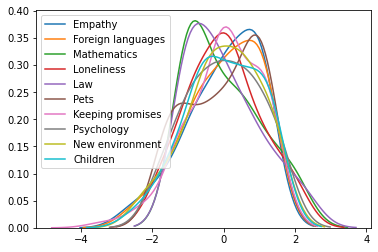

In [14]:
fig = plt.figure()
for v in X_z.sample(10, axis=1).iteritems():
    x = (v[1]-v[1].mean())/v[1].std()
    sns.kdeplot(x, bw=.5, label=v[0])
    plt.legend()

In [15]:
X = X_z

In [16]:
# The response variables (classes) are music genres.
y = d.data[d.categories["music genre"]]
y = y.dropna()
y = pd.DataFrame(scale(y, axis=0), columns = y.columns, index = y.index) #(X-X.mean(0))/X.std(0)

X,y = X.align(y, join="inner", axis=0)

In [17]:
X.shape

(936, 117)

In [20]:
alldata = X.merge(y, right_index=True, left_index=True)

In [22]:
alldata.corr().shape

(134, 134)

### Correlation of vars with the response

<Figure size 1080x720 with 0 Axes>

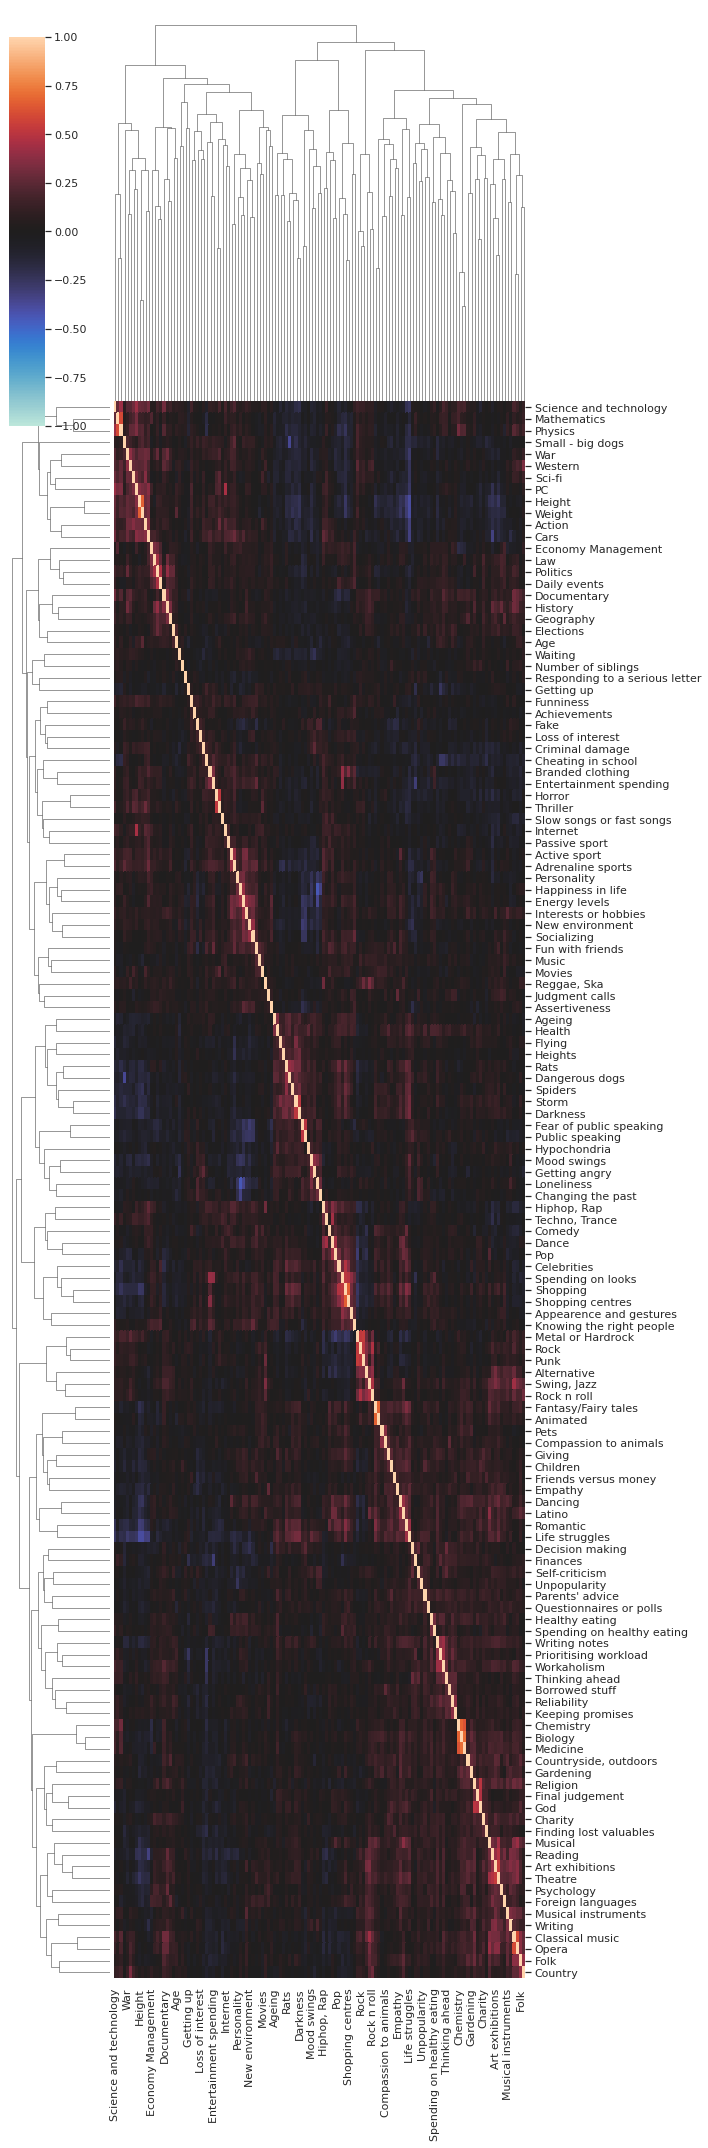

In [45]:
fig = plt.figure()
sns.clustermap(alldata.iloc[:,:].corr(), center=0.00, vmin=-1, vmax=1,yticklabels=True, figsize=(10,30));

In [312]:
def score(v0, v1):
    '''
    Returns a measure of dissimilarity between two vectors.
    Here, the measure is mean squared differences.
    '''
    assert len(v0) == len(v1)
    msd = sum([(i-j)**2 for i,j in zip(v0, v1)]) / len(v0)
    return msd

In [326]:
cmb = []
for resp_var in d.categories['music genre']:
    for expl_var in X.iloc[:,~X.columns.isin(d.categories["music genre"])].columns.tolist():
        cmb.append((expl_var, resp_var))
len(cmb)


1989

In [349]:
scores = {}
for c in cmb:
    v0 = X[c[0]]
    v1 = y[c[1]]
    try:
        scores[c] = score(v0, v1)
    except:
        scores[c] = "some error"
scores = pd.DataFrame(scores.values(), scores.keys()).reset_index()
scores.columns = ["explanatory", "genre", "MSE"]

In [396]:
scores.sort_values("MSE")

               explanatory    genre        MSE
246                Western  Country   5.632560
234                  Music  Country   5.728988
241                 Sci-fi  Country   5.751966
251            Mathematics  Country   5.756422
242                    War  Country   5.757573
..                     ...      ...        ...
759  Prioritising workload     Rock  15.805632
818     Number of siblings     Rock  15.806133
741            Celebrities     Rock  15.834042
740              Gardening     Rock  15.838748
749                  Storm     Rock  15.840416

[1989 rows x 3 columns]


In [397]:
scores.groupby("genre").mean()

MSE
genre                       
Alternative        10.075226
Classical music    10.469787
Country             5.854748
Dance              11.096666
Folk                6.604298
Hiphop, Rap        10.347915
Latino             10.010956
Metal or Hardrock   7.589962
Musical             9.405574
Opera               6.185173
Pop                13.551620
Punk                7.786750
Reggae, Ska         9.217005
Rock               15.673197
Rock n roll        11.592254
Swing, Jazz         9.328060
Techno, Trance      7.239956

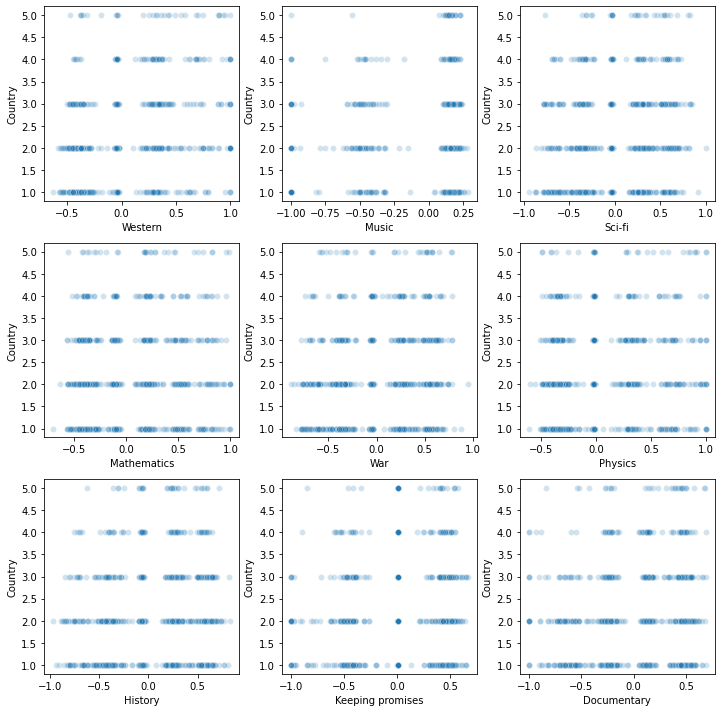

In [395]:
fig,axs = plt.subplots(3,3, figsize=(10,10))
i=0
for _,pair in scores.sort_values("MSE").head(9).iterrows():
    ix = (int(i/3), i%3)
    i+=1
    sns.scatterplot(x = X[pair["explanatory"]], y = y[pair["genre"]], 
                    y_jitter=20, x_jitter=20, alpha=.2, ax=axs[ix])
plt.tight_layout()

# Predict music taste using kNN (sklearn)

In [264]:
from sklearn.neighbors import KNeighborsClassifier

In [265]:
# a boolean classifier - collapse y to 0's and 1's
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y.applymap(lambda x: 1 if x>3 else 0))

KNeighborsClassifier(n_neighbors=3)

In [266]:
#TODO: cross-validation
knn.score(X,y.applymap(lambda x: 1 if x>3 else 0))

0.07585470085470085

# Predict music taste using OLS (sklearn)

In [243]:
"""
# Explanatory variables are all except music genres.
X = d.data.iloc[:,~d.data.columns.isin(d.categories["music genre"])]
X = X.select_dtypes(float)
X.dropna(inplace=True)

# The response variables (classes) are music genres.
y = d.data[d.categories["music genre"]]
y = y.dropna()

X,y = X.align(y, join="inner", axis=0)

# Preprocessing
from sklearn.preprocessing import maxabs_scale
X = pd.DataFrame(maxabs_scale(X, axis=1), columns = X.columns, index = X.index)
y = pd.DataFrame(maxabs_scale(y, axis=1), columns = y.columns, index = y.index)
"""


In [267]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression().fit(X, y)
ols.score(X, y)

0.31885546115379604

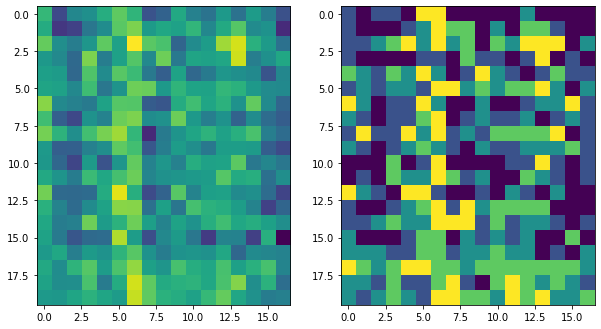

In [268]:
# Visualize predictions
pred_ols = ols.predict(X)
fig,axs = plt.subplots(1,2, figsize=(10,10))
axs[0].imshow(pred_ols[:20,])
axs[1].imshow(y.values[:20,]);

In [269]:
from sklearn.linear_model import Ridge

rig = Ridge(alpha=0.1)
rig.fit(X,y)

# coefficient R^2 is defined as (1 - u/v), where u is the RSS and v is the TSS. Ranges from -1 to 1
rig.score(X,y)

0.31885519888229225

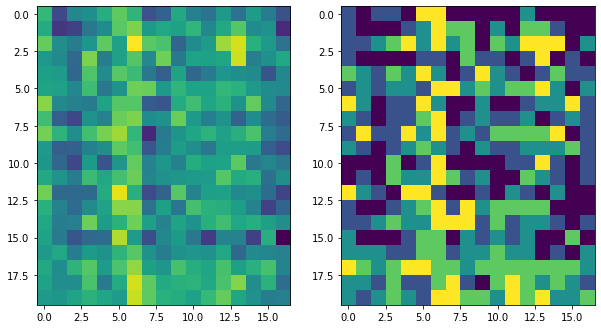

In [270]:
# Visualize predictions
pred_rig = rig.predict(X)
fig,axs = plt.subplots(1,2, figsize=(10,10))
axs[0].imshow(pred_rig[:20,])
axs[1].imshow(y.values[:20,]);

# Predict music taste using tensorflow

In [271]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [288]:
model1 = keras.Sequential([
    layers.Dense(units=17, name="dense_11"),
])
model1.compile(optimizer="sgd", loss="mean_squared_error")

In [289]:
model1.fit(tf.cast(X, tf.float32, name=None),y,epochs=50)

Epoch 1/50
30/30 [==============================] - 0s 587us/step - loss: 9.4377
Epoch 2/50
30/30 [==============================] - 0s 768us/step - loss: 8.8907
Epoch 3/50
30/30 [==============================] - 0s 705us/step - loss: 8.3816
Epoch 4/50
30/30 [==============================] - 0s 579us/step - loss: 7.9038
Epoch 5/50
30/30 [==============================] - 0s 694us/step - loss: 7.4599
Epoch 6/50
30/30 [==============================] - 0s 746us/step - loss: 7.0491
Epoch 7/50
30/30 [==============================] - 0s 671us/step - loss: 6.6659
Epoch 8/50
30/30 [==============================] - 0s 689us/step - loss: 6.3092
Epoch 9/50
30/30 [==============================] - 0s 746us/step - loss: 5.9753
Epoch 10/50
30/30 [==============================] - 0s 528us/step - loss: 5.6631
Epoch 11/50
30/30 [==============================] - 0s 689us/step - loss: 5.3731
Epoch 12/50
30/30 [==============================] - 0s 643us/step - loss: 5.1023
Epoch 13/50
30/30 [======

In [285]:
model1.evaluate(X,y)

30/30 [==============================] - 0s 447us/step - loss: 1.0692


1.0691940784454346

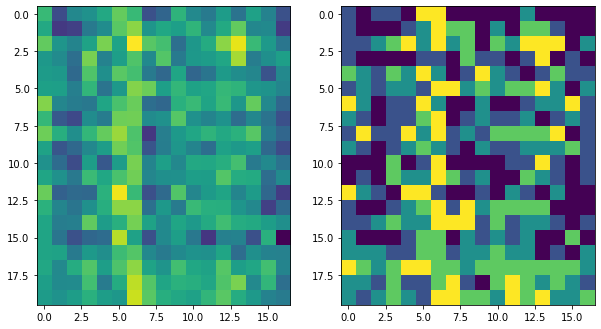

In [286]:
# Visualize predictions
fig,axs = plt.subplots(1,2, figsize=(10,10))
axs[0].imshow(model1.predict(X)[:20,])
axs[1].imshow(y.values[:20,]);

---

In [293]:
model2 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X.keys())], name="dense_21"),
    #layers.Dense(64, activation='relu'),
    # Dense since it's a regression task
    layers.Dense(17, name="dense_22")
])

model2.compile(loss='mse',
                optimizer=tf.keras.optimizers.RMSprop(0.001),
                metrics=['mae', 'mse'])

In [294]:
model2.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                7552      
_________________________________________________________________
dense_22 (Dense)             (None, 17)                1105      
Total params: 8,657
Trainable params: 8,657
Non-trainable params: 0
_________________________________________________________________


In [292]:
model2.fit(tf.cast(X, tf.float32, name=None),y,epochs=50)

Epoch 1/50
30/30 [==============================] - 0s 735us/step - loss: 7.0655 - mae: 2.2895 - mse: 7.0655
Epoch 2/50
30/30 [==============================] - 0s 922us/step - loss: 4.6683 - mae: 1.7749 - mse: 4.6683
Epoch 3/50
30/30 [==============================] - 0s 767us/step - loss: 2.9128 - mae: 1.3644 - mse: 2.9128
Epoch 4/50
30/30 [==============================] - 0s 768us/step - loss: 2.0460 - mae: 1.1555 - mse: 2.0460
Epoch 5/50
30/30 [==============================] - 0s 745us/step - loss: 1.7120 - mae: 1.0643 - mse: 1.7120
Epoch 6/50
30/30 [==============================] - 0s 539us/step - loss: 1.5539 - mae: 1.0161 - mse: 1.5539
Epoch 7/50
30/30 [==============================] - 0s 538us/step - loss: 1.4580 - mae: 0.9852 - mse: 1.4580
Epoch 8/50
30/30 [==============================] - 0s 643us/step - loss: 1.3896 - mae: 0.9618 - mse: 1.3896
Epoch 9/50
30/30 [==============================] - 0s 672us/step - loss: 1.3377 - mae: 0.9429 - mse: 1.3377
Epoch 10/50
30/30 [

In [279]:
# This is MSE
model2.evaluate(X,y)

30/30 [==============================] - 0s 510us/step - loss: 0.7913 - mae: 0.7184 - mse: 0.7913


[0.7913246750831604, 0.7183547019958496, 0.7913246750831604]

In [287]:
# Visualize predictions
fig,axs = plt.subplots(1,2, figsize=(10,10))
axs[0].imshow(model2.predict(X)[:20,])
axs[1].imshow(y.values[:20,]);